## What is the expected value of the sum of 2 dice (six-sided)?

In [1]:
import numpy as np
import pandas as pd
from collections import Counter as C
import matplotlib.pyplot as plt

In [2]:
d1 = pd.DataFrame([i for i in range(1,7)])
d1.index = [1,2,3,4,5,6]
d1.columns = ['RV']
d1['freq'] = 1
d1['prob'] = 1/6
d1['EV'] = d1.RV * d1.prob
d1

,RV,freq,prob,EV
1,1,1,0.166667,0.166667
2,2,1,0.166667,0.333333
3,3,1,0.166667,0.500000
4,4,1,0.166667,0.666667
5,5,1,0.166667,0.833333
6,6,1,0.166667,1.000000


In [4]:
sum(d1.prob), sum(d1.EV)

(0.9999999999999999, 3.5)

In [5]:
d2           = pd.DataFrame([ [(j,i) for i in range(1,7)] for j in range(1,7)])
d2.index     = ['D1_1','D1_2','D1_3','D1_4','D1_5','D1_6']
d2.columns   = ['D2_1','D2_2','D2_3','D2_4','D2_5','D2_6']
d2

,D2_1,D2_2,D2_3,D2_4,D2_5,D2_6
D1_1,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)"
D1_2,"(2, 1)","(2, 2)","(2, 3)","(2, 4)","(2, 5)","(2, 6)"
D1_3,"(3, 1)","(3, 2)","(3, 3)","(3, 4)","(3, 5)","(3, 6)"
D1_4,"(4, 1)","(4, 2)","(4, 3)","(4, 4)","(4, 5)","(4, 6)"
D1_5,"(5, 1)","(5, 2)","(5, 3)","(5, 4)","(5, 5)","(5, 6)"
D1_6,"(6, 1)","(6, 2)","(6, 3)","(6, 4)","(6, 5)","(6, 6)"


In [7]:
d2sum         = pd.DataFrame([[ j+i for i in range(1,7)] for j in range(1,7)])
d2sum.index   = d2.index
d2sum.columns = d2.columns
d2sum

,D2_1,D2_2,D2_3,D2_4,D2_5,D2_6
D1_1,2,3,4,5,6,7
D1_2,3,4,5,6,7,8
D1_3,4,5,6,7,8,9
D1_4,5,6,7,8,9,10
D1_5,6,7,8,9,10,11
D1_6,7,8,9,10,11,12


In [ ]:
# let us calculate EXPECTED VALUE of all possible outcomes (sum) from the roll of 2 dice 

In [38]:
x = [i+j for i in range(1,7) for j in range(1,7)]
x

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

In [13]:
d = C(x)
d

Counter({2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1})

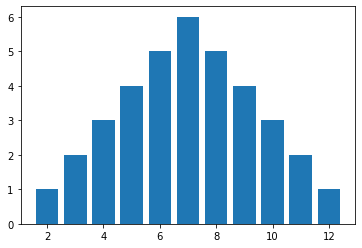

In [14]:
plt.bar(d.keys(), d.values())
plt.show()

In [15]:
# expected value of a six-sided die
die    =  1*1/6 + 2*1/6 + 3*1/6 + 4*1/6+ 5*1/6 + 6*1/6
die

3.5

In [16]:
#expected value of the sum of the two numbers obtained when 2 dice are rolled
dice_2 =  2*1/36 + 3*2/36 + 4*3/36 + 5*4/36 + 6*5/36 + 7*6/36 + 8 *5/36 + 9*4/36 + 10*3/36 + 11*2/36 + 12*1/36 
dice_2

7.000000000000001

In [17]:
sum((np.array(list(d.keys()))*(np.array(list(d.values()))/36)))

6.999999999999999

In [36]:
df_EV             =  pd.DataFrame(d.keys(),columns = ['RV'])
df_EV['freq']     =  d.values() 
df_EV['prob']     =  df_EV.freq/36 
df_EV['EV']       =  df_EV.RV * df_EV.prob
df_EV['cumSumEV'] =  np.cumsum(df_EV.EV)
df_EV

,RV,freq,prob,EV,cumSumEV
0,2,1,0.027778,0.055556,0.055556
1,3,2,0.055556,0.166667,0.222222
2,4,3,0.083333,0.333333,0.555556
3,5,4,0.111111,0.555556,1.111111
4,6,5,0.138889,0.833333,1.944444
5,7,6,0.166667,1.166667,3.111111
6,8,5,0.138889,1.111111,4.222222
7,9,4,0.111111,1.000000,5.222222
8,10,3,0.083333,0.833333,6.055556
9,11,2,0.055556,0.611111,6.666667


In [37]:
sum(df_EV.prob), sum(df_EV.EV)

(1.0000000000000002, 6.999999999999999)

## SIMULATION

In [39]:
RV = np.random.choice(x, 100000)
df_RV = pd.DataFrame(RV, columns = ['RV'])
df_RV.index = df_RV.index+1

In [41]:
df_RV.head()

,RV
1,6
2,7
3,8
4,6
5,4


In [43]:
d_RV = C(RV)

In [44]:
sorted(d_RV.items())

[(2, 2732),
 (3, 5530),
 (4, 8434),
 (5, 11015),
 (6, 13878),
 (7, 16731),
 (8, 13923),
 (9, 11265),
 (10, 8366),
 (11, 5481),
 (12, 2645)]

In [45]:
sum(d_RV.values())

100000

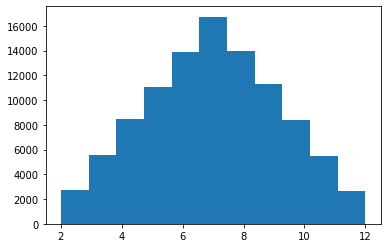

In [46]:
plt.hist(RV, 11)
plt.show()

In [47]:
df_RV

,RV
1,6
2,7
3,8
4,6
5,4
...,...
99996,7
99997,6
99998,4
99999,5


In [48]:
for RV in range(2,13) :
    df_RV['is'+str(RV)] = df_RV['RV'].apply(lambda x : 1 if x==RV else 0)
for RV in range(2,13):
    df_RV['cS_is'+str(RV)] = np.cumsum(df_RV['is'+str(RV)])
for RV in range(2,13) :
    df_RV['EV'+str(RV)]  = (df_RV['cS_is'+str(RV)]*RV)/df_RV.index

In [51]:
df_RV

,RV,is2,is3,is4,is5,is6,is7,is8,is9,is10,is11,is12,cS_is2,cS_is3,cS_is4,cS_is5,cS_is6,cS_is7,cS_is8,cS_is9,cS_is10,cS_is11,cS_is12,EV2,EV3,EV4,EV5,EV6,EV7,EV8,EV9,EV10,EV11,EV12
1,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
3,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,2.000000,2.333333,2.666667,0.000000,0.000000,0.000000,0.000000
4,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3.000000,1.750000,2.000000,0.000000,0.000000,0.000000,0.000000
5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,1,1,0,0,0,0,0.000000,0.000000,0.800000,0.000000,2.400000,1.400000,1.600000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,7,0,0,0,0,0,1,0,0,0,0,0,2732,5530,8433,11014,13877,16731,13923,11265,8365,5481,2645,0.054642,0.165907,0.337333,0.550722,0.832653,1.171217,1.113885,1.013891,0.836533,0.602934,0.317413
99997,6,0,0,0,0,1,0,0,0,0,0,0,2732,5530,8433,11014,13878,16731,13923,11265,8365,5481,2645,0.054642,0.165905,0.337330,0.550717,0.832705,1.171205,1.113873,1.013880,0.836525,0.602928,0.317410
99998,4,0,0,1,0,0,0,0,0,0,0,0,2732,5530,8434,11014,13878,16731,13923,11265,8365,5481,2645,0.054641,0.165903,0.337367,0.550711,0.832697,1.171193,1.113862,1.013870,0.836517,0.602922,0.317406
99999,5,0,0,0,1,0,0,0,0,0,0,0,2732,5530,8434,11015,13878,16731,13923,11265,8365,5481,2645,0.054641,0.165902,0.337363,0.550756,0.832688,1.171182,1.113851,1.013860,0.836508,0.602916,0.317403


In [50]:
pd.set_option('display.max_columns', 40)

In [52]:
df_RV

,RV,is2,is3,is4,is5,is6,is7,is8,is9,is10,is11,is12,cS_is2,cS_is3,cS_is4,cS_is5,cS_is6,cS_is7,cS_is8,cS_is9,cS_is10,cS_is11,cS_is12,EV2,EV3,EV4,EV5,EV6,EV7,EV8,EV9,EV10,EV11,EV12
1,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
3,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,2.000000,2.333333,2.666667,0.000000,0.000000,0.000000,0.000000
4,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3.000000,1.750000,2.000000,0.000000,0.000000,0.000000,0.000000
5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,1,1,0,0,0,0,0.000000,0.000000,0.800000,0.000000,2.400000,1.400000,1.600000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,7,0,0,0,0,0,1,0,0,0,0,0,2732,5530,8433,11014,13877,16731,13923,11265,8365,5481,2645,0.054642,0.165907,0.337333,0.550722,0.832653,1.171217,1.113885,1.013891,0.836533,0.602934,0.317413
99997,6,0,0,0,0,1,0,0,0,0,0,0,2732,5530,8433,11014,13878,16731,13923,11265,8365,5481,2645,0.054642,0.165905,0.337330,0.550717,0.832705,1.171205,1.113873,1.013880,0.836525,0.602928,0.317410
99998,4,0,0,1,0,0,0,0,0,0,0,0,2732,5530,8434,11014,13878,16731,13923,11265,8365,5481,2645,0.054641,0.165903,0.337367,0.550711,0.832697,1.171193,1.113862,1.013870,0.836517,0.602922,0.317406
99999,5,0,0,0,1,0,0,0,0,0,0,0,2732,5530,8434,11015,13878,16731,13923,11265,8365,5481,2645,0.054641,0.165902,0.337363,0.550756,0.832688,1.171182,1.113851,1.013860,0.836508,0.602916,0.317403


In [53]:
df_RV.columns

Index(['RV', 'is2', 'is3', 'is4', 'is5', 'is6', 'is7', 'is8', 'is9', 'is10',
       'is11', 'is12', 'cS_is2', 'cS_is3', 'cS_is4', 'cS_is5', 'cS_is6',
       'cS_is7', 'cS_is8', 'cS_is9', 'cS_is10', 'cS_is11', 'cS_is12', 'EV2',
       'EV3', 'EV4', 'EV5', 'EV6', 'EV7', 'EV8', 'EV9', 'EV10', 'EV11',
       'EV12'],
      dtype='object')

In [54]:
col = df_RV.columns[23:]
col

Index(['EV2', 'EV3', 'EV4', 'EV5', 'EV6', 'EV7', 'EV8', 'EV9', 'EV10', 'EV11',
       'EV12'],
      dtype='object')

In [55]:
df_RV.head()

,RV,is2,is3,is4,is5,is6,is7,is8,is9,is10,is11,is12,cS_is2,cS_is3,cS_is4,cS_is5,cS_is6,cS_is7,cS_is8,cS_is9,cS_is10,cS_is11,cS_is12,EV2,EV3,EV4,EV5,EV6,EV7,EV8,EV9,EV10,EV11,EV12
1,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,3.500000,0.000000,0.0,0.0,0.0,0.0
3,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.333333,2.666667,0.0,0.0,0.0,0.0
4,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.750000,2.000000,0.0,0.0,0.0,0.0
5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,1,1,0,0,0,0,0.0,0.0,0.8,0.0,2.4,1.400000,1.600000,0.0,0.0,0.0,0.0


In [56]:
df_RV.tail()

,RV,is2,is3,is4,is5,is6,is7,is8,is9,is10,is11,is12,cS_is2,cS_is3,cS_is4,cS_is5,cS_is6,cS_is7,cS_is8,cS_is9,cS_is10,cS_is11,cS_is12,EV2,EV3,EV4,EV5,EV6,EV7,EV8,EV9,EV10,EV11,EV12
99996,7,0,0,0,0,0,1,0,0,0,0,0,2732,5530,8433,11014,13877,16731,13923,11265,8365,5481,2645,0.054642,0.165907,0.337333,0.550722,0.832653,1.171217,1.113885,1.013891,0.836533,0.602934,0.317413
99997,6,0,0,0,0,1,0,0,0,0,0,0,2732,5530,8433,11014,13878,16731,13923,11265,8365,5481,2645,0.054642,0.165905,0.337330,0.550717,0.832705,1.171205,1.113873,1.013880,0.836525,0.602928,0.317410
99998,4,0,0,1,0,0,0,0,0,0,0,0,2732,5530,8434,11014,13878,16731,13923,11265,8365,5481,2645,0.054641,0.165903,0.337367,0.550711,0.832697,1.171193,1.113862,1.013870,0.836517,0.602922,0.317406
99999,5,0,0,0,1,0,0,0,0,0,0,0,2732,5530,8434,11015,13878,16731,13923,11265,8365,5481,2645,0.054641,0.165902,0.337363,0.550756,0.832688,1.171182,1.113851,1.013860,0.836508,0.602916,0.317403
100000,10,0,0,0,0,0,0,0,0,1,0,0,2732,5530,8434,11015,13878,16731,13923,11265,8366,5481,2645,0.054640,0.165900,0.337360,0.550750,0.832680,1.171170,1.113840,1.013850,0.836600,0.602910,0.317400


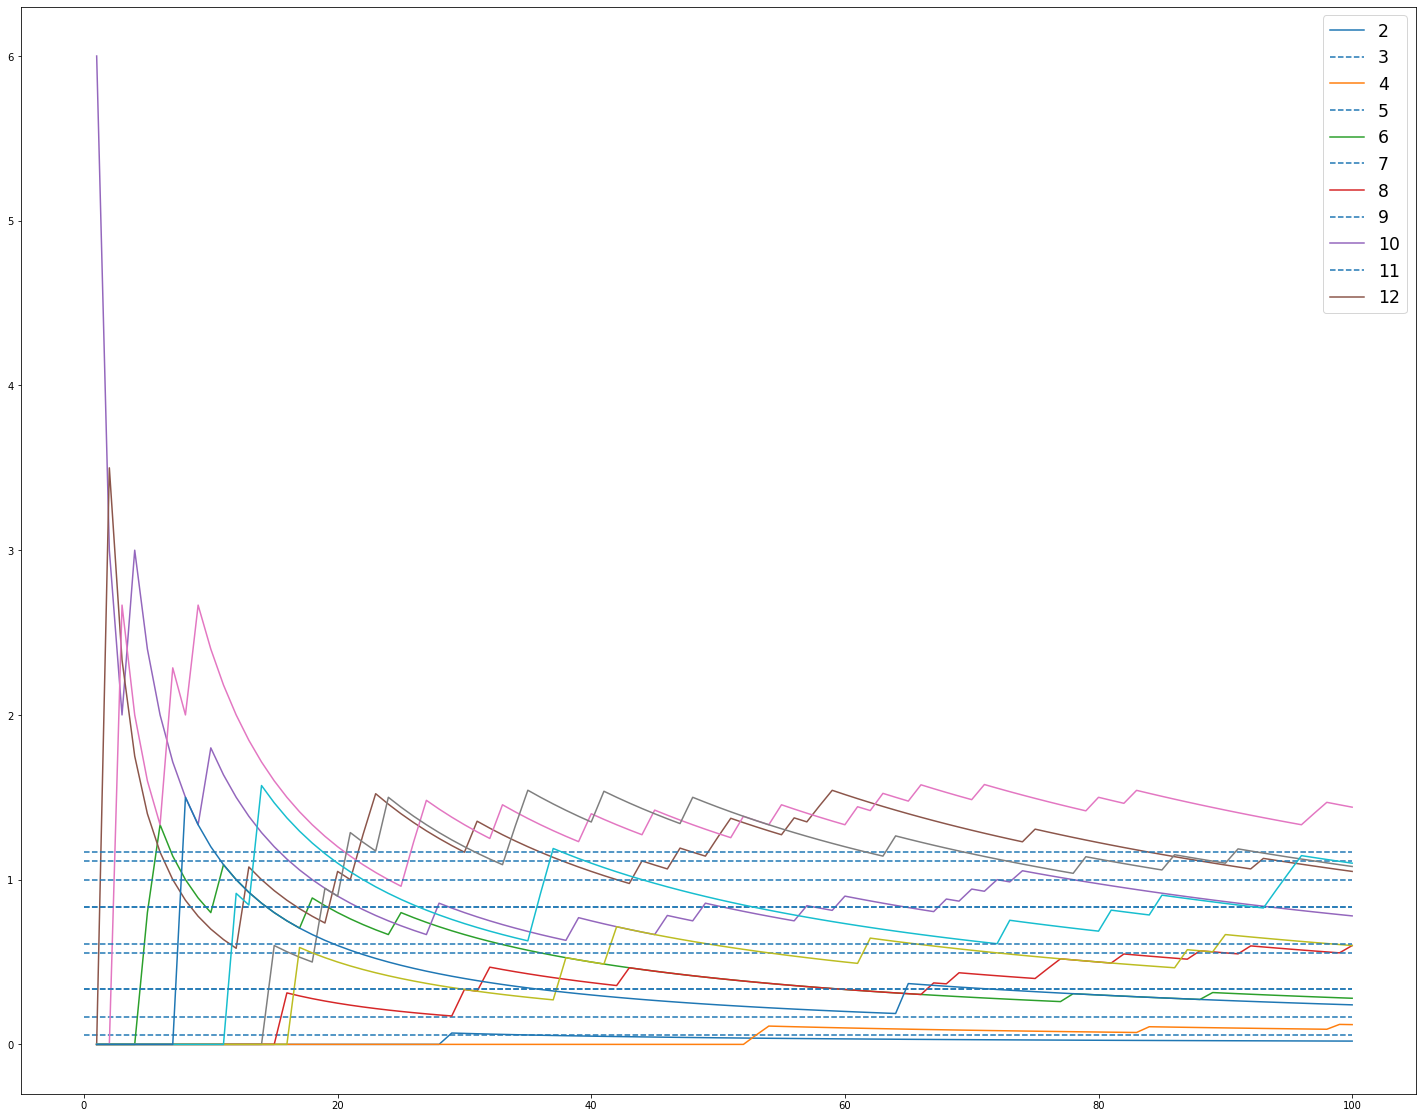

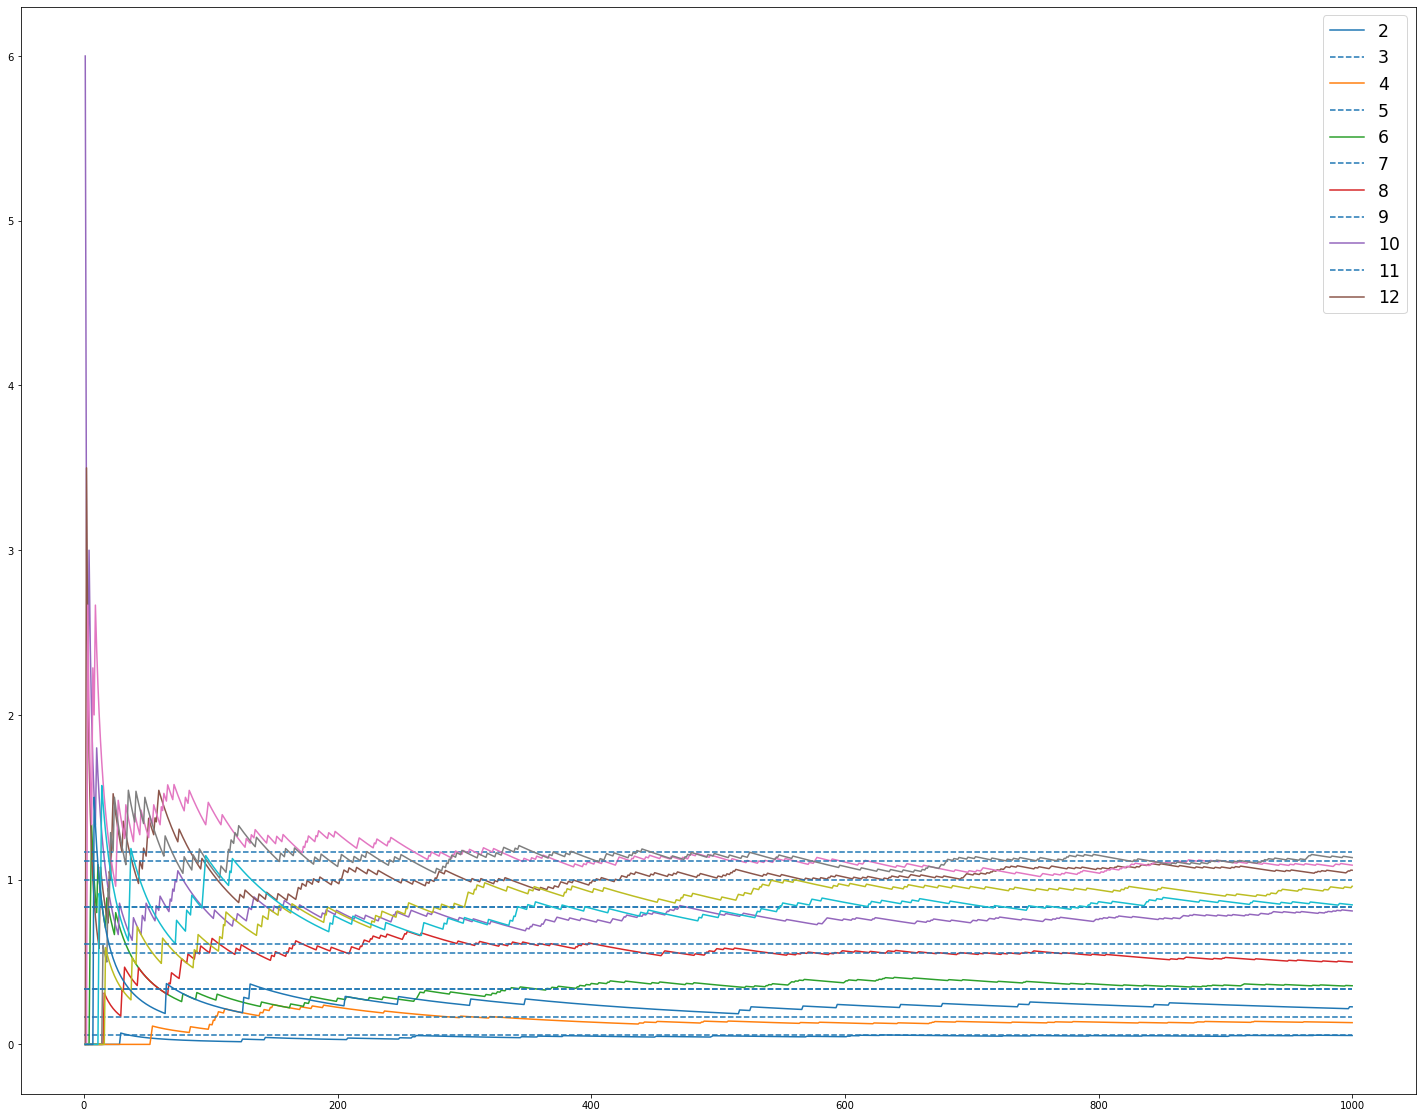

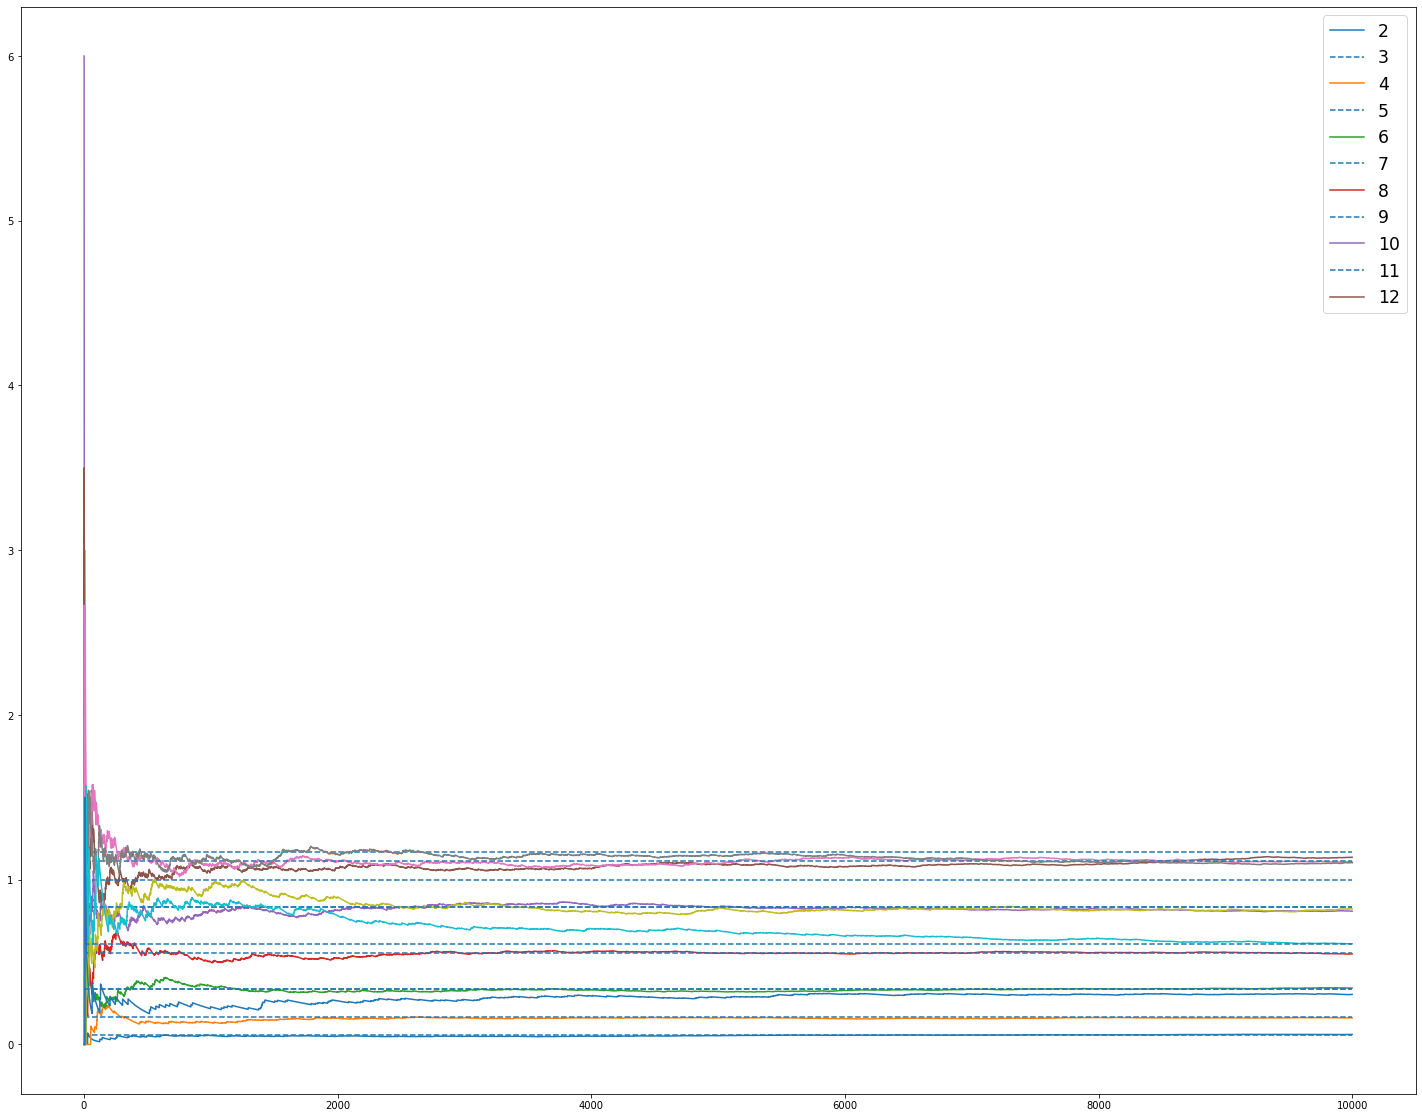

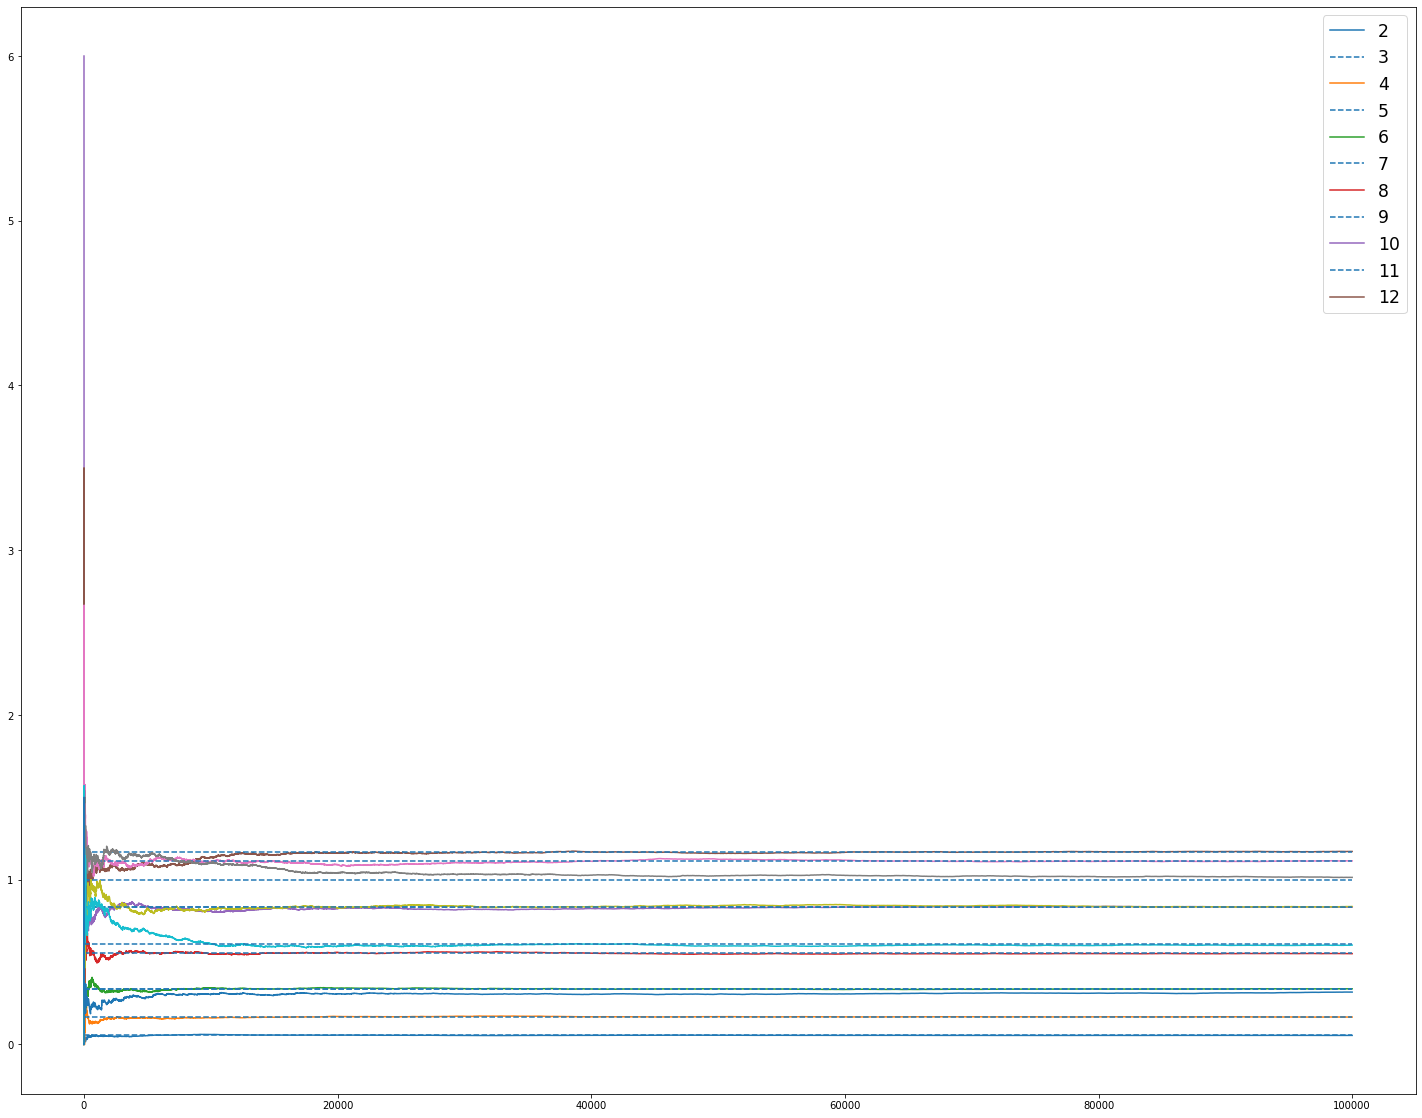

In [58]:
col =df_RV.columns[23:]
for stop in [100,1000,10000, len(df_RV)] :
    plt.figure(figsize=(25,20))
    for c in col :
        plt.plot(list(range(1, stop+1)), df_RV.loc[ :stop, c]) 
        plt.hlines(df_EV.loc[df_EV.RV== int(c[2:])].EV, 0, stop, linestyles='dashed')
        plt.legend([2,3,4,5,6,7,8,9,10,11,12], fontsize='xx-large')
    plt.show()

In [59]:
df_EV

,RV,freq,prob,EV,cumSumEV
0,2,1,0.027778,0.055556,0.055556
1,3,2,0.055556,0.166667,0.222222
2,4,3,0.083333,0.333333,0.555556
3,5,4,0.111111,0.555556,1.111111
4,6,5,0.138889,0.833333,1.944444
5,7,6,0.166667,1.166667,3.111111
6,8,5,0.138889,1.111111,4.222222
7,9,4,0.111111,1.000000,5.222222
8,10,3,0.083333,0.833333,6.055556
9,11,2,0.055556,0.611111,6.666667


In [64]:
df_RV.tail(1)

,RV,is2,is3,is4,is5,is6,is7,is8,is9,is10,is11,is12,cS_is2,cS_is3,cS_is4,cS_is5,cS_is6,cS_is7,cS_is8,cS_is9,cS_is10,cS_is11,cS_is12,EV2,EV3,EV4,EV5,EV6,EV7,EV8,EV9,EV10,EV11,EV12
100000,10,0,0,0,0,0,0,0,0,1,0,0,2732,5530,8434,11015,13878,16731,13923,11265,8366,5481,2645,0.05464,0.1659,0.33736,0.55075,0.83268,1.17117,1.11384,1.01385,0.8366,0.60291,0.3174


In [63]:
sum(df_RV[col].tail(1).values[0])

6.997099999999999

In [65]:
x = df_RV[col].apply(lambda x : sum(x))
x

EV2       5492.544551
EV3      16630.808461
EV4      33651.801057
EV5      55212.627387
EV6      82828.564102
EV7     115732.222151
EV8     111082.012219
EV9     103953.659572
EV10     83774.553700
EV11     61083.090105
EV12     30607.106138
dtype: float64

In [ ]:
len(df_RV)

In [66]:
sum(x)/len(df_RV)

7.000489894421329